In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
audi_cars = pd.read_csv("data/audi_cars_data.csv")
list(audi_cars.columns)
audi_cars.head()

,Price,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type
0,5900.0,Used,Audi,100,2.0 E,C4 (1991-1994),1992,262000.0,101.0,1984.0,Gasoline
1,6900.0,Used,Audi,100,Avant 2.8 E,C4 (1991-1994),1991,332000.0,174.0,2771.0,Gasoline + LPG
2,5000.0,Used,Audi,100,Avant 2.6 E,C4 (1991-1994),1993,500000.0,150.0,2598.0,Gasoline
3,19900.0,Used,Audi,100,NaN,C1 (1968-1976),1974,99000.0,115.0,1900.0,Gasoline
4,14999.0,Used,Audi,100,Avant 2.2,C3 (1982-1991),1987,108729.0,137.0,2226.0,Gasoline


In [117]:
audi_a3_cars = audi_cars[audi_cars["Vehicle_model"] == 'A3']
audi_a3_2010 = audi_a3_cars[audi_a3_cars["Production_year"] == 2010]
audi_a3_2000ccm = audi_a3_cars[audi_a3_cars["Displacement_cm3"] >= 1950]
audi_a3_2000ccm = audi_a3_2000ccm[audi_a3_2000ccm["Displacement_cm3"] <= 2050]
audi_a3_2000ccm = audi_a3_2000ccm.dropna()
np.mean(audi_a3_2000ccm["Mileage_km"])

201186.6954887218

In [118]:
import pandas as pd
import cmdstanpy


model = cmdstanpy.CmdStanModel(stan_file='car_price_1_ppc.stan')

INFO:cmdstanpy:compiling stan file /home/DA/project/car_price_1_ppc.stan to exe file /home/DA/project/car_price_1_ppc
INFO:cmdstanpy:compiled model executable: /home/DA/project/car_price_1_ppc


In [119]:
R = 2000
N = 532
data = {'N': N,
        'x1_new': np.array([np.random.normal(20000, 70000) for _ in range(N)]),
        'x2_new': np.array([np.random.normal(2009, 4) for _ in range(N)])
        }
sim=model.sample(data = data, iter_sampling=R,
                     iter_warmup=0,
                     chains=4,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |███▎      | 00:00 Status


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       

chain 3 |██████████| 00:02 Sampling completed


chain 4 |██████████| 00:02 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [120]:
sim_pd = sim.draws_pd()
prices_sim_pd = sim_pd.loc[:, 'y_generated[1]':'y_generated[100]'].values
sim_pd.head()

,lp__,accept_stat__,alpha,beta1,beta2,y_generated[1],y_generated[2],y_generated[3],y_generated[4],y_generated[5],...,y_generated[523],y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532]
0,0.0,0.0,0.815985,0.899524,5.44859,84692.5,109764.0,46303.7,-40574.6,43971.5,...,65003.9,40869.9,85385.8,60894.0,89868.9,-5634.08,31707.6,4628.81,21585.3,104667.0
1,0.0,0.0,0.815985,0.899524,5.44859,84692.0,109765.0,46305.0,-40575.2,43972.5,...,65005.3,40867.4,85384.4,60893.3,89866.2,-5634.81,31708.3,4630.36,21587.6,104667.0
2,0.0,0.0,0.815985,0.899524,5.44859,84693.5,109764.0,46304.6,-40574.8,43972.5,...,65005.0,40870.3,85386.3,60896.3,89867.8,-5633.21,31705.0,4628.48,21586.3,104666.0
3,0.0,0.0,0.815985,0.899524,5.44859,84692.5,109765.0,46304.8,-40573.7,43971.6,...,65003.9,40869.2,85385.9,60894.9,89867.8,-5631.47,31706.9,4626.69,21585.1,104667.0
4,0.0,0.0,0.815985,0.899524,5.44859,84693.8,109765.0,46303.7,-40575.8,43972.7,...,65005.2,40870.8,85387.0,60894.8,89867.7,-5634.90,31708.0,4627.01,21583.3,104669.0


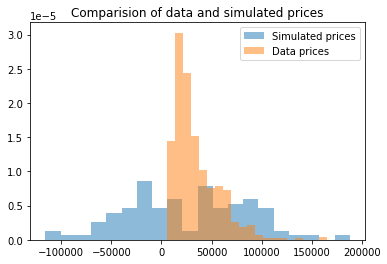

In [121]:
plt.figure()

plt.hist(prices_sim_pd[0], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()

In [122]:
data = {
    'N': len(audi_a3_2000ccm),
    'x1': audi_a3_2000ccm['Mileage_km'].values,
    'x2': audi_a3_2000ccm['Production_year'].values,
    'y': audi_a3_2000ccm['Price'].values
}

model_fit = cmdstanpy.CmdStanModel(stan_file='car_price_1_fit.stan')
fit = model_fit.sample(data=data, chains=4, iter_warmup=1000, iter_sampling=2000)


INFO:cmdstanpy:compiling stan file /home/DA/project/car_price_1_fit.stan to exe file /home/DA/project/car_price_1_fit
INFO:cmdstanpy:compiled model executable: /home/DA/project/car_price_1_fit
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▎         | 00:00 Status


chain 1 |▉         | 00:01 Iteration:  100 / 3000 [  3%]  (Warmup)



chain 1 |█▎        | 00:04 Iteration:  200 / 3000 [  6%]  (Warmup)


chain 1 |█▌        | 00:06 Iteration:  300 / 3000 [ 10%]  (Warmup)








chain 1 |█▉        | 00:07 Iteration:  400 / 3000 [ 13%]  (Warmup)

chain 1 |██▏       | 00:07 Iteration:  500 / 3000 [ 16%]  (Warmup)


chain 1 |██▌       | 00:08 Iteration:  600 / 3000 [ 20%]  (Warmup)

chain 1 |██▊       | 00:09 Iteration:  700 / 3000 [ 23%]  (Warmup)


chain 1 |███▏      | 00:10 Iteration:  800 / 3000 [ 26%]  (Warmup)


chain 1 |███▍      | 00:13 Iteration:  900 / 3000 [ 30%]  (Warmup)






chain 1 |████      | 00:18 Iteration: 1001 / 3000 [ 33%]  (Sampl

INFO:cmdstanpy:CmdStan done processing.


In [123]:
fit_pd = fit.draws_pd()
fit_pd

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[523],y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532]
0,-523560.0,0.869405,0.000901,10.0,1023.0,0.0,523562.0,-202701.0,-0.277964,146.686,...,35070.7,61804.2,60297.6,41607.6,50916.0,23052.8,50202.7,80368.7,38890.3,51228.3
1,-523565.0,0.574616,0.000901,10.0,1023.0,0.0,523569.0,-201553.0,-0.278246,146.192,...,34959.1,60065.4,61849.4,40912.0,49021.8,24703.5,50883.9,82399.1,39896.0,50520.5
2,-523566.0,0.766454,0.000901,6.0,103.0,0.0,523571.0,-201850.0,-0.278165,146.360,...,37061.4,60783.5,57032.3,43339.2,51184.3,22780.1,49737.0,83045.9,39490.6,50820.3
3,-523565.0,0.999414,0.000901,10.0,1023.0,0.0,523569.0,-201933.0,-0.278188,146.381,...,32723.6,56873.7,58450.7,40189.5,47873.2,25488.8,48915.0,81472.8,42356.7,50633.0
4,-523560.0,0.940234,0.000901,3.0,11.0,0.0,523566.0,-202140.0,-0.278188,146.345,...,37270.8,60681.6,61332.8,39359.4,48431.7,26317.1,47166.5,80159.0,40284.5,50708.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-523561.0,1.000000,0.000927,1.0,3.0,0.0,523562.0,-205603.0,-0.278781,148.134,...,34673.5,59774.3,60628.6,41608.5,51651.4,24286.8,50794.1,83793.3,43490.0,48309.6
7996,-523560.0,0.880042,0.000927,9.0,895.0,0.0,523563.0,-201762.0,-0.279210,146.271,...,38673.3,61252.9,57594.5,39905.6,50658.9,24110.5,47866.7,80303.3,43880.9,52318.5
7997,-523560.0,0.787108,0.000927,6.0,63.0,0.0,523562.0,-202219.0,-0.279220,146.448,...,37133.6,61509.7,61420.9,40641.1,50236.3,27445.9,47070.1,79506.8,43010.3,51667.4
7998,-523558.0,0.728164,0.000927,5.0,55.0,0.0,523563.0,-203361.0,-0.279175,147.046,...,36192.7,58419.4,58712.6,46484.5,51385.5,26538.9,49520.0,80560.4,41553.1,50188.0


In [124]:
prices = fit_pd.loc[:, 'y_generated[1]':'y_generated[532]'].values

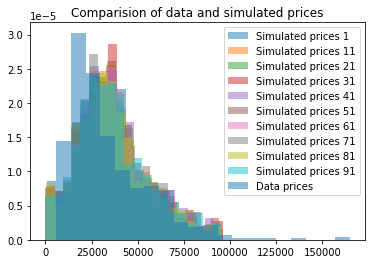

In [125]:
plt.figure()
for i in range(1, 100, 10):
    plt.hist(prices[i], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices {i}')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()